In [1]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cpptrajOut(path,filename):
    import numpy as np
    stdout = open(path+filename)
    for line in stdout:
        if 'Avg. throughput' in line:
            throughput = np.float(line.split()[3])
        elif 'Init' in line:
            init = np.float(line.split()[3])
        elif 'Trajectory Process' in line:
            trj_proc = np.float(line.split()[4])
        elif 'Action Post' in line:
            action_post = np.float(line.split()[4])
        elif 'TIME' in line and 'Analysis' in line:
            analysis = np.float(line.split()[3])
        elif 'Data File Write' in line:
            data_write = np.float(line.split()[5])
        elif 'Other' in line:
            other = np.float(line.split()[3])
        elif 'Run Total' in line:
            run_total= np.float(line.split()[3])
        elif 'Total execution time:' in line:
            time_ex = np.float(line.split()[4])
        elif 'Complete Report Data' in line:
            remora_folder_tmp=line.split()[4]
            remora_folder = remora_folder_tmp.split('/')[-1]
            
    lines=0
    rd_sum=0
    home_rate_file = open(path+remora_folder+'/IO/lustre_home1_rate.txt')
    for line in home_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    homeRD = np.divide(rd_sum,lines)
        
    lines=0
    rd_sum=0
    work_rate_file = open(path+remora_folder+'/IO/lustre_work_rate.txt')
    for line in work_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    workRD = np.divide(rd_sum,lines)
        
    lines=0
    rd_sum=0
    scratch_rate_file = open(path+remora_folder+'/IO/lustre_scratch_rate.txt') 
    for line in scratch_rate_file:
        if 'TIMESTAMP' not in line:
            rd_sum+=np.float(line.split()[2])
            lines+=1
    scratchRD = np.divide(rd_sum,lines)
        
    stdout.close()
    home_rate_file.close()
    work_rate_file.close()
    scratch_rate_file.close()
        
    return np.array([throughput,init,trj_proc,action_post,analysis,data_write,other,run_total,time_ex,homeRD,scratchRD,workRD])

# Data Read

In [8]:
#Work FS 1 MPI per Core, 50 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x1_work/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work/16_3/','cpptraj_en_16_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x1_work_tmp=pd.DataFrame(columns=columns)

x1_work_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x1_work_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x1_work_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x1_work_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x1_work_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x1_work_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x1_work_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x1_work_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x1_work_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x1_work_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x1_work_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x1_work_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x1_work_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x1_work_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x1_work_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))

x1_work=pd.DataFrame(columns=columns)
x1_work.loc[0]=x1_work_tmp[0:3].mean()
x1_work.loc[1]=x1_work_tmp[3:6].mean()
x1_work.loc[2]=x1_work_tmp[6:9].mean()
x1_work.loc[3]=x1_work_tmp[9:12].mean()
x1_work.loc[4]=x1_work_tmp[12:15].mean()
x1_work.drop('try', axis=1, inplace=True)
speedup_x1_work = np.array([x1_work['run_total'][0]/x1_work['run_total'][0],
                            x1_work['run_total'][0]/x1_work['run_total'][1],
                            x1_work['run_total'][0]/x1_work['run_total'][2],
                            x1_work['run_total'][0]/x1_work['run_total'][3],
                            x1_work['run_total'][0]/x1_work['run_total'][4]])

In [9]:
#Work FS 1 MPI per Processor, 50 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x1_work_2/1_1/', 'cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/1_2/', 'cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/1_3/', 'cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/2_1/', 'cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/2_2/', 'cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/2_3/', 'cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/4_1/', 'cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/4_2/', 'cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/4_3/', 'cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/8_1/', 'cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/8_2/', 'cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/8_3/', 'cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x1_work_2/16_3/','cpptraj_en_16_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x1_work_2_tmp=pd.DataFrame(columns=columns)

x1_work_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x1_work_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x1_work_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x1_work_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x1_work_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x1_work_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x1_work_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x1_work_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x1_work_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x1_work_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x1_work_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x1_work_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x1_work_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x1_work_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x1_work_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))


x1_work_2=pd.DataFrame(columns=columns)
x1_work_2.loc[0]=x1_work_2_tmp[0:3].mean()
x1_work_2.loc[1]=x1_work_2_tmp[3:6].mean()
x1_work_2.loc[2]=x1_work_2_tmp[6:9].mean()
x1_work_2.loc[3]=x1_work_2_tmp[9:12].mean()
x1_work_2.loc[4]=x1_work_2_tmp[12:15].mean()
x1_work_2.drop('try', axis=1, inplace=True)

speedup_x1_work_2 = np.array([x1_work_2['run_total'][0]/x1_work_2['run_total'][0],
                              x1_work_2['run_total'][0]/x1_work_2['run_total'][1],
                              x1_work_2['run_total'][0]/x1_work_2['run_total'][2],
                              x1_work_2['run_total'][0]/x1_work_2['run_total'][3],
                              x1_work_2['run_total'][0]/x1_work_2['run_total'][4]])

In [10]:
#Scratch FS 1 MPI per Processor, 50 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x1_scratch_2/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x1_scratch_2/16_3/','cpptraj_en_16_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x1_scratch_2_tmp=pd.DataFrame(columns=columns)

x1_scratch_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x1_scratch_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x1_scratch_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x1_scratch_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x1_scratch_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x1_scratch_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x1_scratch_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x1_scratch_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x1_scratch_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x1_scratch_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x1_scratch_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x1_scratch_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x1_scratch_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x1_scratch_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x1_scratch_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))

x1_scratch_2=pd.DataFrame(columns=columns)
x1_scratch_2.loc[0]=x1_scratch_2_tmp[0:3].mean()
x1_scratch_2.loc[1]=x1_scratch_2_tmp[3:6].mean()
x1_scratch_2.loc[2]=x1_scratch_2_tmp[6:9].mean()
x1_scratch_2.loc[3]=x1_scratch_2_tmp[9:12].mean()
x1_scratch_2.loc[4]=x1_scratch_2_tmp[12:15].mean()
x1_scratch_2.drop('try', axis=1, inplace=True)


speedup_x1_scratch_2 = np.array([x1_scratch_2['run_total'][0]/x1_scratch_2['run_total'][0],
                                 x1_scratch_2['run_total'][0]/x1_scratch_2['run_total'][1],
                                 x1_scratch_2['run_total'][0]/x1_scratch_2['run_total'][2],
                                 x1_scratch_2['run_total'][0]/x1_scratch_2['run_total'][3],
                                 x1_scratch_2['run_total'][0]/x1_scratch_2['run_total'][4]])

In [11]:
#Work FS 1 MPI per Core, 100 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x2_work/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_work_tmp=pd.DataFrame(columns=columns)

x2_work_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_work_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_work_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_work_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_work_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_work_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_work_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_work_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_work_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_work_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_work_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_work_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_work_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_work_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_work_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_work_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_work_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_work_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_work=pd.DataFrame(columns=columns)
x2_work.loc[0]=x2_work_tmp[0:3].mean()
x2_work.loc[1]=x2_work_tmp[3:6].mean()
x2_work.loc[2]=x2_work_tmp[6:9].mean()
x2_work.loc[3]=x2_work_tmp[9:12].mean()
x2_work.loc[4]=x2_work_tmp[12:15].mean()
x2_work.loc[5]=x2_work_tmp[15:18].mean()
x2_work.drop('try', axis=1, inplace=True)
speedup_x2_work = np.array([x2_work['run_total'][0]/x2_work['run_total'][0],
                            x2_work['run_total'][0]/x2_work['run_total'][1],
                            x2_work['run_total'][0]/x2_work['run_total'][2],
                            x2_work['run_total'][0]/x2_work['run_total'][3],
                            x2_work['run_total'][0]/x2_work['run_total'][4],
                            x2_work['run_total'][0]/x2_work['run_total'][5]])

In [12]:
#Work FS 1 MPI per Processor, 100 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x2_work_2/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/RemoraRuns/x2_work_2/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_work_2_tmp=pd.DataFrame(columns=columns)

x2_work_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_work_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_work_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_work_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_work_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_work_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_work_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_work_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_work_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_work_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_work_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_work_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_work_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_work_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_work_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_work_2_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_work_2_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_work_2_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_work_2=pd.DataFrame(columns=columns)
x2_work_2.loc[0]=x2_work_2_tmp[0:3].mean()
x2_work_2.loc[1]=x2_work_2_tmp[3:6].mean()
x2_work_2.loc[2]=x2_work_2_tmp[6:9].mean()
x2_work_2.loc[3]=x2_work_2_tmp[9:12].mean()
x2_work_2.loc[4]=x2_work_2_tmp[12:15].mean()
x2_work_2.loc[5]=x2_work_2_tmp[15:18].mean()
x2_work_2.drop('try', axis=1, inplace=True)

speedup_x2_work_2 = np.array([x2_work_2['run_total'][0]/x2_work_2['run_total'][0],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][1],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][2],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][3],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][4],
                              x2_work_2['run_total'][0]/x2_work_2['run_total'][5]])

In [13]:
#Work FS 1 MPI per Processor, 100 GBs
outputFiles=[['VanillaExecution/RemoraRuns/x2_scratch_2/1_1/','cpptraj_en_1_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/1_2/','cpptraj_en_1_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/1_3/','cpptraj_en_1_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_1/','cpptraj_en_2_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_2/','cpptraj_en_2_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/2_3/','cpptraj_en_2_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_1/','cpptraj_en_4_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_2/','cpptraj_en_4_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/4_3/','cpptraj_en_4_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_1/','cpptraj_en_8_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_2/','cpptraj_en_8_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/8_3/','cpptraj_en_8_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_1/','cpptraj_en_16_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_2/','cpptraj_en_16_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/16_3/','cpptraj_en_16_3.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_1/','cpptraj_en_32_1.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_2/','cpptraj_en_32_2.out'],
             ['VanillaExecution/RemoraRuns/x2_scratch_2/32_3/','cpptraj_en_32_3.out']]

columns=['cores','try','throughput','init',
         'trj_proc','action_post','analysis',
         'data_write','other','run_total',
         'time_ex','homeRD','scratchRD','workRD']

x2_scratch_2_tmp=pd.DataFrame(columns=columns)

x2_scratch_2_tmp.loc[0]=np.hstack((np.array([1,1]),cpptrajOut(outputFiles[0][0],outputFiles[0][1])))
x2_scratch_2_tmp.loc[1]=np.hstack((np.array([1,2]),cpptrajOut(outputFiles[1][0],outputFiles[1][1])))
x2_scratch_2_tmp.loc[2]=np.hstack((np.array([1,3]),cpptrajOut(outputFiles[2][0],outputFiles[2][1])))
x2_scratch_2_tmp.loc[3]=np.hstack((np.array([2,1]),cpptrajOut(outputFiles[3][0],outputFiles[3][1])))
x2_scratch_2_tmp.loc[4]=np.hstack((np.array([2,2]),cpptrajOut(outputFiles[4][0],outputFiles[4][1])))
x2_scratch_2_tmp.loc[5]=np.hstack((np.array([2,3]),cpptrajOut(outputFiles[5][0],outputFiles[5][1])))
x2_scratch_2_tmp.loc[6]=np.hstack((np.array([4,1]),cpptrajOut(outputFiles[6][0],outputFiles[6][1])))
x2_scratch_2_tmp.loc[7]=np.hstack((np.array([4,2]),cpptrajOut(outputFiles[7][0],outputFiles[7][1])))
x2_scratch_2_tmp.loc[8]=np.hstack((np.array([4,3]),cpptrajOut(outputFiles[8][0],outputFiles[8][1])))
x2_scratch_2_tmp.loc[9]=np.hstack((np.array([8,1]),cpptrajOut(outputFiles[9][0],outputFiles[9][1])))
x2_scratch_2_tmp.loc[10]=np.hstack((np.array([8,2]),cpptrajOut(outputFiles[10][0],outputFiles[10][1])))
x2_scratch_2_tmp.loc[11]=np.hstack((np.array([8,3]),cpptrajOut(outputFiles[11][0],outputFiles[11][1])))
x2_scratch_2_tmp.loc[12]=np.hstack((np.array([16,1]),cpptrajOut(outputFiles[12][0],outputFiles[12][1])))
x2_scratch_2_tmp.loc[13]=np.hstack((np.array([16,2]),cpptrajOut(outputFiles[13][0],outputFiles[13][1])))
x2_scratch_2_tmp.loc[14]=np.hstack((np.array([16,3]),cpptrajOut(outputFiles[14][0],outputFiles[14][1])))
x2_scratch_2_tmp.loc[15]=np.hstack((np.array([32,1]),cpptrajOut(outputFiles[15][0],outputFiles[15][1])))
x2_scratch_2_tmp.loc[16]=np.hstack((np.array([32,2]),cpptrajOut(outputFiles[16][0],outputFiles[16][1])))
x2_scratch_2_tmp.loc[17]=np.hstack((np.array([32,3]),cpptrajOut(outputFiles[17][0],outputFiles[17][1])))

x2_scratch_2=pd.DataFrame(columns=columns)
x2_scratch_2.loc[0]=x2_scratch_2_tmp[0:3].mean()
x2_scratch_2.loc[1]=x2_scratch_2_tmp[3:6].mean()
x2_scratch_2.loc[2]=x2_scratch_2_tmp[6:9].mean()
x2_scratch_2.loc[3]=x2_scratch_2_tmp[9:12].mean()
x2_scratch_2.loc[4]=x2_scratch_2_tmp[12:15].mean()
x2_scratch_2.loc[5]=x2_scratch_2_tmp[15:18].mean()
x2_scratch_2.drop('try', axis=1, inplace=True)

speedup_x2_scratch_2 = np.array([x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][0],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][1],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][2],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][3],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][4],
                              x2_scratch_2['run_total'][0]/x2_scratch_2['run_total'][5]])

# Plotting

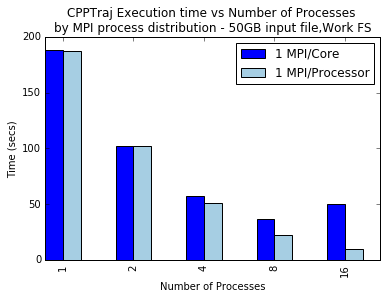

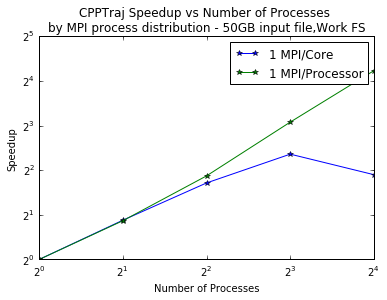

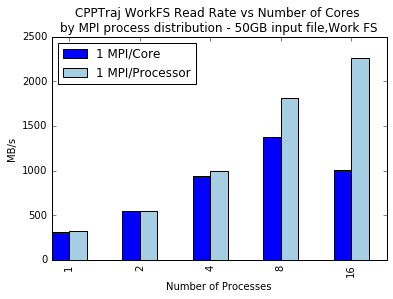

In [18]:
x=np.array([1,2,4,8,16])
fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Execution time vs Number of Processes \nby MPI process distribution - 50GB input file,Work FS')
x1_work.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='run_total',legend=True)
x1_work_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='run_total',colormap='Paired',legend=True)
axes.legend(['1 MPI/Core','1 MPI/Processor'])
plt.ylabel('Time (secs)')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajExecCoreVsProc50g.png',dpi=800)
plt.savefig('cpptrajExecCoreVsProc50g.pdf',dpi=800)

plt.figure()
plt.loglog(x,speedup_x1_work,'b-*',basex=2,basey=2,label='1 MPI/Core')
plt.loglog(x,speedup_x1_work_2,'g-*',basex=2,basey=2,label='1 MPI/Processor')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes')
plt.legend()
plt.title('CPPTraj Speedup vs Number of Processes \nby MPI process distribution - 50GB input file,Work FS')
plt.savefig('cpptrajSpeedCoreVsProc50g.png',dpi=800)
plt.savefig('cpptrajSpeedCoreVsProc50g.pdf',dpi=800)

fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj WorkFS Read Rate vs Number of Cores \nby MPI process distribution - 50GB input file,Work FS')
x1_work.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='workRD',legend=True)
x1_work_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='workRD',colormap='Paired',legend=True)
axes.legend(['1 MPI/Core','1 MPI/Processor'],loc='best')
plt.ylabel('MB/s')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajReadCoreVsProc50g.png',dpi=800)
plt.savefig('cpptrajReadCoreVsProc50g.pdf',dpi=800)


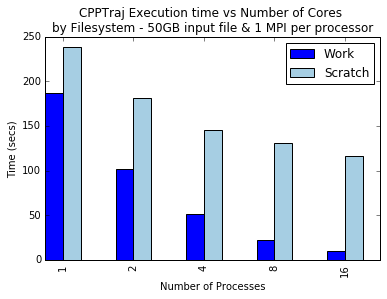

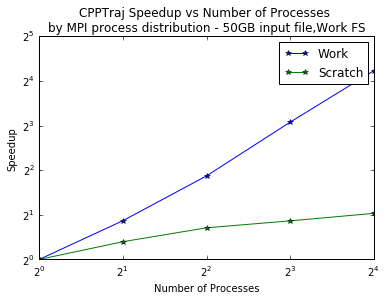

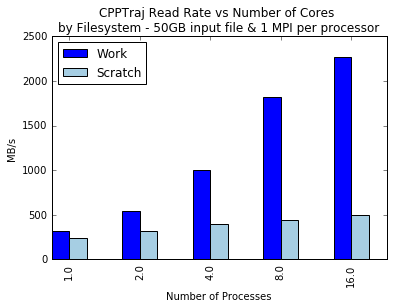

In [19]:
x=np.array([1,2,4,8,16])
fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Execution time vs Number of Cores \nby Filesystem - 50GB input file & 1 MPI per processor')
x1_work_2.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='run_total',legend=True)
x1_scratch_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='run_total',colormap='Paired',legend=True)
axes.legend(['Work','Scratch'])
plt.ylabel('Time (secs)')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajExecWorkVsScratch50g.png',dpi=800)
plt.savefig('cpptrajExecWorkVsScratch50g.pdf',dpi=800)

plt.figure()
plt.loglog(x,speedup_x1_work_2,'b-*',basex=2,basey=2,label='Work')
plt.loglog(x,speedup_x1_scratch_2,'g-*',basex=2,basey=2,label='Scratch')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes')
plt.legend()
plt.title('CPPTraj Speedup vs Number of Processes \nby MPI process distribution - 50GB input file,Work FS')
plt.savefig('cpptrajSpeedWorkVsScratch50g.png',dpi=800)
plt.savefig('cpptrajSpeedWorkVsScratch50g.pdf',dpi=800)
                  
fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Read Rate vs Number of Cores \nby Filesystem - 50GB input file & 1 MPI per processor')
x1_work_2.plot(kind='bar',ax=axes,position=1,width=0.25,x='cores',y='workRD',legend=True)
x1_scratch_2.plot(kind='bar',position=0,ax=axes,width=0.25,x='cores',y='scratchRD',colormap='Paired',legend=True)
axes.legend(['Work','Scratch'],loc='best')
plt.ylabel('MB/s')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajReadWorkVsScratch50g.png',dpi=800)
plt.savefig('cpptrajReadWorkVsScratch50g.pdf',dpi=800)

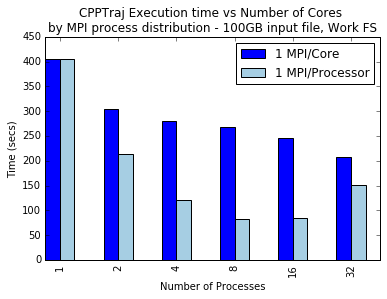

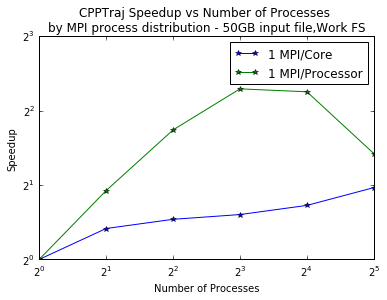

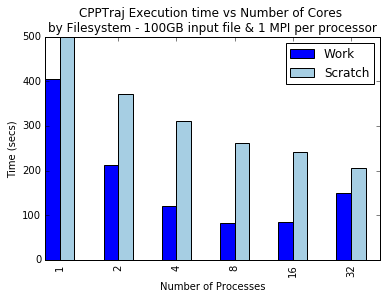

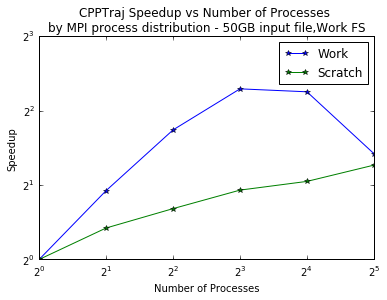

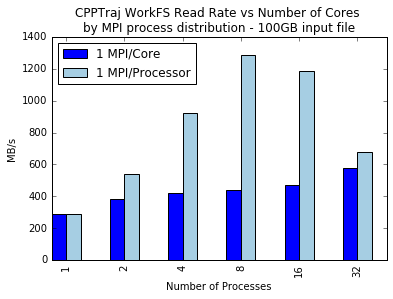

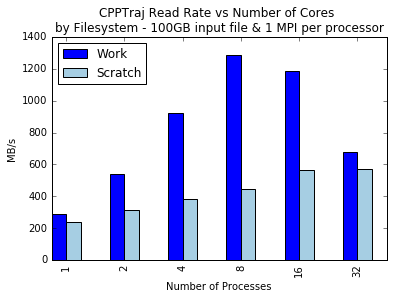

In [20]:
x=np.array([1,2,4,8,16,32])
fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Execution time vs Number of Cores \nby MPI process distribution - 100GB input file, Work FS')
x2_work.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='run_total',legend=True)
x2_work_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='run_total',colormap='Paired',legend=True)
axes.legend(['1 MPI/Core','1 MPI/Processor'])
plt.ylabel('Time (secs)')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajExecCoreVsProc100g.png',dpi=800)
plt.savefig('cpptrajExecCoreVsProc100g.pdf',dpi=800)

plt.figure()
plt.loglog(x,speedup_x2_work,'b-*',basex=2,basey=2,label='1 MPI/Core')
plt.loglog(x,speedup_x2_work_2,'g-*',basex=2,basey=2,label='1 MPI/Processor')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes')
plt.legend()
plt.title('CPPTraj Speedup vs Number of Processes \nby MPI process distribution - 50GB input file,Work FS')
plt.savefig('cpptrajSpeedCoreVsProc100g.png',dpi=800)
plt.savefig('cpptrajSpeedCoreVsProc100g.pdf',dpi=800)

fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Execution time vs Number of Cores \nby Filesystem - 100GB input file & 1 MPI per processor')
x2_work_2.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='run_total',legend=True)
x2_scratch_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='run_total',colormap='Paired',legend=True)
axes.legend(['Work','Scratch'])
plt.ylabel('Time (secs)')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajExecWorkVsScratch100g.png',dpi=800)
plt.savefig('cpptrajExecWorkVsScratch100g.pdf',dpi=800)

plt.figure()
plt.loglog(x,speedup_x2_work_2,'b-*',basex=2,basey=2,label='Work')
plt.loglog(x,speedup_x2_scratch_2,'g-*',basex=2,basey=2,label='Scratch')
plt.ylabel('Speedup')
plt.xlabel('Number of Processes')
plt.legend()
plt.title('CPPTraj Speedup vs Number of Processes \nby MPI process distribution - 50GB input file,Work FS')
plt.savefig('cpptrajSpeedWorkVsScratch100g.png',dpi=800)
plt.savefig('cpptrajSpeedWorkVsScratch100g.pdf',dpi=800)

fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj WorkFS Read Rate vs Number of Cores \nby MPI process distribution - 100GB input file')
x2_work.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='workRD',legend=True)
x2_work_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='workRD',colormap='Paired',legend=True)
axes.legend(['1 MPI/Core','1 MPI/Processor'],loc='best')
plt.ylabel('MB/s')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajReadCoreVsProc100g.png',dpi=800)
plt.savefig('cpptrajReadCoreVsProc100g.pdf',dpi=800)

fig,axes=plt.subplots(nrows=1,ncols=1)
plt.title('CPPTraj Read Rate vs Number of Cores \nby Filesystem - 100GB input file & 1 MPI per processor')
x2_work_2.plot(kind='bar',ax=axes,position=1,width=0.25,x=x,y='workRD',legend=True)
x2_scratch_2.plot(kind='bar',position=0,ax=axes,width=0.25,x=x,y='scratchRD',colormap='Paired',legend=True)
axes.legend(['Work','Scratch'],loc='best')
plt.ylabel('MB/s')
plt.xlabel('Number of Processes')
plt.savefig('cpptrajReadWorkVsScratch100g.png',dpi=800)
plt.savefig('cpptrajReadWorkVsScratch100g.pdf',dpi=800)

# Combined plots